In [34]:
from ROOT import RDataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from tqdm import tqdm

from fftprep.fftprep import make_img, fft_filter, fft_filter_pairwise, reconstruct_img, complete_data_pw, load_from_sparse, fftpredictor, params_pairwise

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from scipy.signal import detrend

import pickle

from itertools import combinations

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from scipy.stats import crystalball
from scipy.optimize import curve_fit

In [ ]:
data = RDataFrame("t;1", "FullSim_10GeV.root").AsNumpy()
X = np.array(
    [
        data["part_p"],
        data["part_x"], 
        data["part_y"],
        data["part_z"],
        data["part_theta"],
        data["part_phi"]
    ]
).transpose()
obs = data["cl_E_ecal"]
del data
subset = (X.transpose()[1]>500) \
            *(X.transpose()[1]<3500) \
            *(X.transpose()[2]>500) \
            *(X.transpose()[2]<2500) \
            *(X.transpose()[3]>12280) \
            *(X.transpose()[3]<12300) \
            *(X.transpose()[4]<0.6) \
            *(X.transpose()[5]<2*np.pi) \
    
X_full, obs_full = X[subset], obs[subset]
del X
del obs

In [106]:
fft_filt_5gev = complete_data_pw(load_from_sparse(return_full=False, n_sigma = 1))

In [11]:
fft_filt_data_pw['X_v_Y']

array([[ 3.80843563e+07   +0.j        ,  1.91652463e+03-5876.43518468j,
        -1.10677765e+03 -796.00379397j, ...,
         1.83764564e+03-2305.47684434j, -1.10677765e+03 +796.00379397j,
         1.91652463e+03+5876.43518468j],
       [-9.83784850e+02-6245.60806389j, -5.04805731e+03 -413.33612488j,
        -1.39813789e+03+2711.28638026j, ...,
        -5.21177141e+02 -954.51906049j,  1.00000000e+00   +0.j        ,
         2.58937627e+03-1806.42329427j],
       [ 1.00000000e+00   +0.j        , -2.76888120e+02+2091.16465178j,
         4.58043437e+02+1143.88107235j, ...,
        -1.00267909e+03 -134.40452185j, -1.09976666e+03 +300.29913224j,
        -9.27095529e+02 +600.37857189j],
       ...,
       [ 8.90782255e+03 -634.61631429j,  5.84731179e+02 -503.39681207j,
        -6.93210914e+02 -812.72837461j, ...,
         6.65941616e+02 -199.10081302j,  1.00000000e+00   +0.j        ,
        -6.12187819e+02 -443.8812424j ],
       [ 1.00000000e+00   +0.j        , -9.27095529e+02 -600.3785718

In [73]:
fft_filt_10gev = fft_filter_pairwise(X_full, obs_full, params_pairwise, n_sigma = 1)

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 60.91it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^7.2482659795988145


60000it [00:00, 1854710.43it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 63.27it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.3279866550412


18000it [00:00, 1891550.92it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 64.58it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.43286396172409


18900it [00:00, 1909440.83it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 63.85it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.889249207398564


12000it [00:00, 1858490.81it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 62.73it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.950078781617968


12600it [00:00, 1843714.43it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 62.02it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.704326965099103


3780it [00:00, 1520520.68it/s]


In [46]:
fft_filt_1gev["X_v_Y"]

array([[ 6.75432283e+06  +0.j        ,  5.41155542e+01-448.64873587j,
         1.00000000e+00  +0.j        , ...,
         5.26949720e+02-699.57422083j,  1.00000000e+00  +0.j        ,
         5.41155542e+01+448.64873587j],
       [-2.01265639e+02-997.74824937j, -8.13098101e+02 +28.95872671j,
        -2.28337970e+02+405.07967732j, ...,
         1.00000000e+00  +0.j        ,  1.00000000e+00  +0.j        ,
         1.00000000e+00  +0.j        ],
       [ 3.56147424e+02-490.37018028j, -1.27952166e+01+443.43591167j,
         1.00000000e+00  +0.j        , ...,
        -2.22968723e+02-198.93015992j,  1.00000000e+00  +0.j        ,
        -3.07683761e+02+197.03865627j],
       ...,
       [ 2.83857804e+03-566.03269079j,  1.00000000e+00  +0.j        ,
         1.00000000e+00  +0.j        , ...,
         1.00000000e+00  +0.j        ,  1.00000000e+00  +0.j        ,
         2.47578115e+02-138.59720926j],
       [ 3.56147424e+02+490.37018028j, -3.07683761e+02-197.03865627j,
         1.00000000e+0

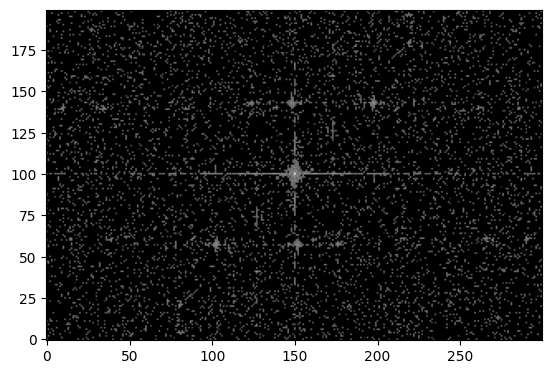

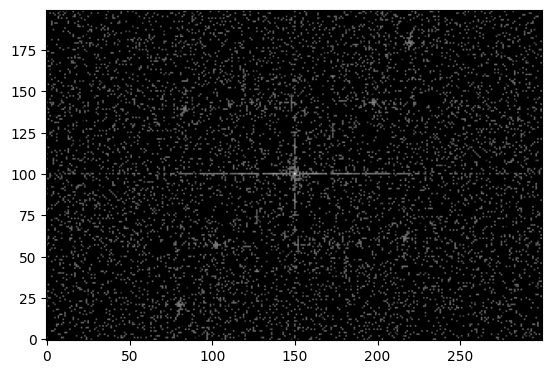

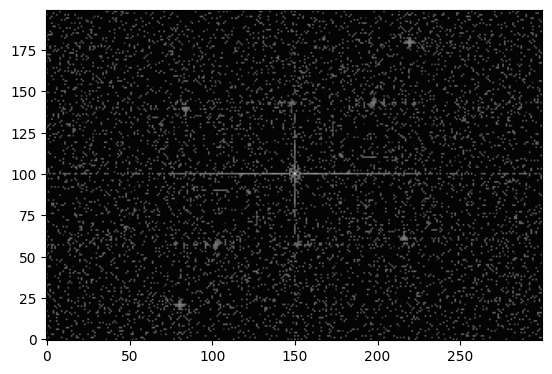

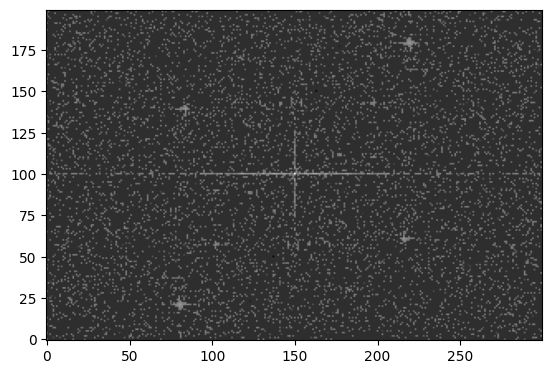

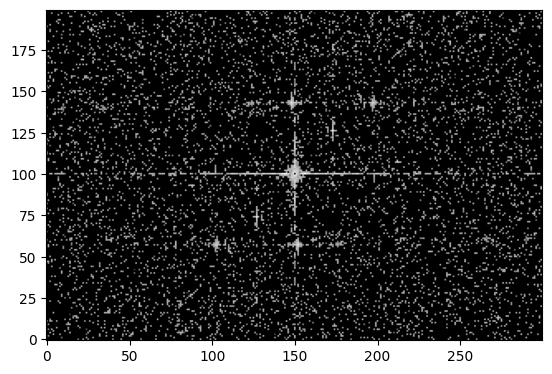

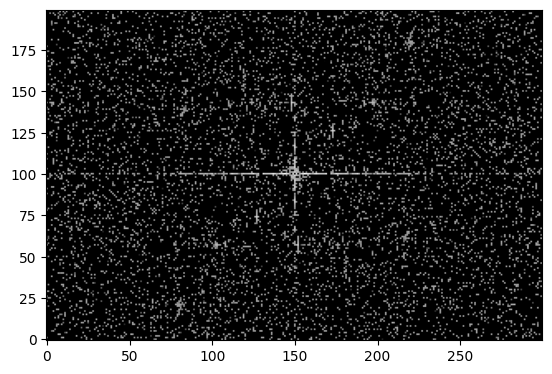

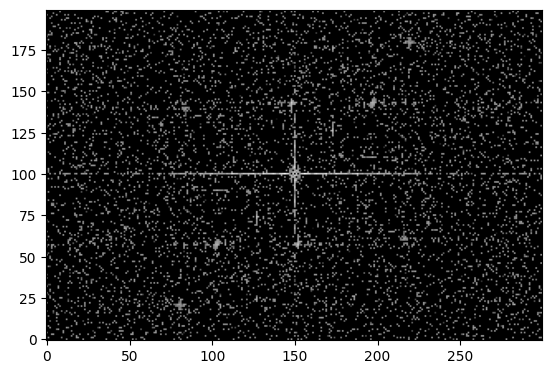

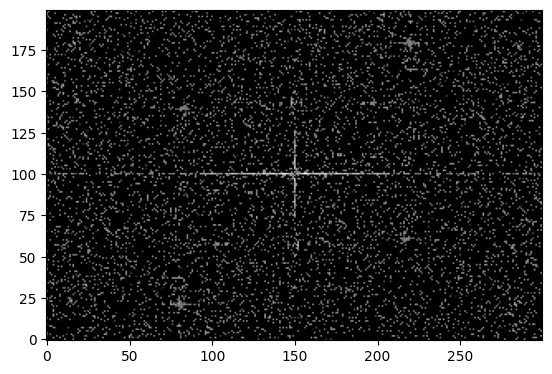

In [51]:
plt.imshow(np.log(abs(np.fft.fftshift(fft_filt_50gev["X_v_Y"]).real).transpose()), cmap='gray', origin="lower")
plt.show()
plt.imshow(np.log(abs(np.fft.fftshift(fft_filt_10gev["X_v_Y"]).real).transpose()), cmap='gray', origin="lower")
plt.show()
plt.imshow(np.log(abs(np.fft.fftshift(fft_filt_5gev["X_v_Y"]).real).transpose()), cmap='gray', origin="lower")
plt.show()
plt.imshow(np.log(abs(np.fft.fftshift(fft_filt_1gev["X_v_Y"]).real).transpose()), cmap='gray', origin="lower")
plt.show()
plt.imshow(np.log(abs(np.fft.fftshift(fft_filt_50gev["X_v_Y"]).imag).transpose()+1), cmap='gray', origin="lower")
plt.show()
plt.imshow(np.log(abs(np.fft.fftshift(fft_filt_10gev["X_v_Y"]).imag).transpose()+1), cmap='gray', origin="lower")
plt.show()
plt.imshow(np.log(abs(np.fft.fftshift(fft_filt_5gev["X_v_Y"]).imag).transpose()+1), cmap='gray', origin="lower")
plt.show()
plt.imshow(np.log(abs(np.fft.fftshift(fft_filt_1gev["X_v_Y"]).imag).transpose()+1), cmap='gray', origin="lower")
plt.show()

In [52]:
np.log(abs(np.fft.fftshift(fft_filt_1gev["X_v_Y"]).real).transpose())

array([[5.76710843, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.38801423],
       ...,
       [2.41946903, 0.        , 0.        , ..., 0.        , 5.46078892,
        0.        ],
       [0.        , 5.38801423, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
inputs = np.concatenate(
    ( 
        np.array(list(np.ndindex(fft_filt_data_pw["X_v_Y"].shape))), 
        fft_filt_data_pw["X_v_Y"].real.flatten().reshape(-1,1), 
        fft_filt_data_pw["X_v_Y"].imag.flatten().reshape(-1,1) 
    ),
    axis=1
)

In [47]:
targets = np.concatenate(
    (
        fft_filt_10gev["X_v_Y"].real.flatten().reshape(-1,1), 
        fft_filt_10gev["X_v_Y"].imag.flatten().reshape(-1,1) 
    ),
    axis=1
)

In [51]:
reg = LinearRegression()
reg.fit(inputs, targets)

In [52]:
reg.fit(inputs, targets)

LinearRegression()

In [58]:
bin_preds = reg.predict(inputs)

In [60]:
fft_filt_preds = np.array(bin_preds.transpose()[0] + 1j*bin_preds.transpose()[1]).reshape(fft_filt_data_pw["X_v_Y"].shape)

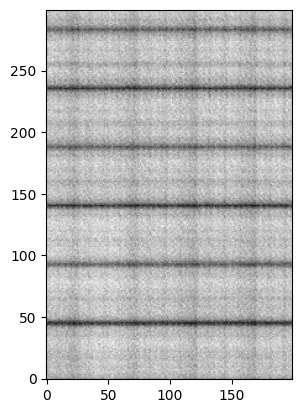

In [61]:
fft_filt_preds = np.array(bin_preds.transpose()[0] + 1j*bin_preds.transpose()[1]).reshape(fft_filt_data_pw["X_v_Y"].shape)
plt.imshow(abs(np.fft.ifftn(fft_filt_preds)), cmap='gray', origin="lower")

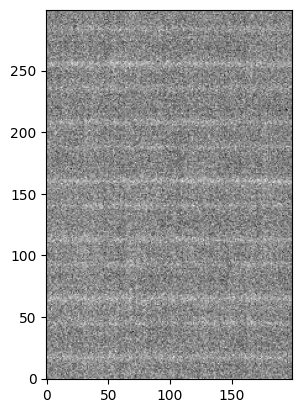

In [64]:
 plt.imshow(abs(np.fft.ifftn(fft_filt_10gev["X_v_Y"])) - abs(np.fft.ifftn(fft_filt_preds)), cmap='gray', origin="lower")

In [70]:
abs(np.fft.ifftn(fft_filt_10gev["X_v_Y"])).min()

1279.5794780402025

In [69]:
abs(np.fft.ifftn(fft_filt_preds)).min()

1277.9248623994088

In [2]:
data = RDataFrame("t;1", "FullSim_10GeV.root").AsNumpy()
X = np.array(
    [
        data["part_p"],
        data["part_x"], 
        data["part_y"],
        data["part_z"],
        data["part_theta"],
        data["part_phi"]
    ]
).transpose()
obs = data["cl_E_ecal"]
del data
subset = (X.transpose()[1]>500) \
            *(X.transpose()[1]<3500) \
            *(X.transpose()[2]>500) \
            *(X.transpose()[2]<2500) \
            *(X.transpose()[3]>12280) \
            *(X.transpose()[3]<12300) \
            *(X.transpose()[4]<0.6) \
            *(X.transpose()[5]<2*np.pi) \
    
X_full_10gev, obs_full_10gev = X[subset], obs[subset]
del X
del obs

In [3]:
data = RDataFrame("t;1", "FullSim_50GeV.root").AsNumpy()
X = np.array(
    [
        data["part_p"],
        data["part_x"], 
        data["part_y"],
        data["part_z"],
        data["part_theta"],
        data["part_phi"]
    ]
).transpose()
obs = data["cl_E_ecal"]
del data
subset = (X.transpose()[1]>500) \
            *(X.transpose()[1]<3500) \
            *(X.transpose()[2]>500) \
            *(X.transpose()[2]<2500) \
            *(X.transpose()[3]>12280) \
            *(X.transpose()[3]<12300) \
            *(X.transpose()[4]<0.6) \
            *(X.transpose()[5]<2*np.pi) \
    
X_full_50gev, obs_full_50gev = X[subset], obs[subset]
del X
del obs

In [31]:
data = RDataFrame("t;1", "FullSim_1GeV.root").AsNumpy()
X = np.array(
    [
        data["part_p"],
        data["part_x"], 
        data["part_y"],
        data["part_z"],
        data["part_theta"],
        data["part_phi"]
    ]
).transpose()
obs = data["cl_E_ecal"]
del data
subset = (X.transpose()[1]>500) \
            *(X.transpose()[1]<3500) \
            *(X.transpose()[2]>500) \
            *(X.transpose()[2]<2500) \
            *(X.transpose()[3]>12280) \
            *(X.transpose()[3]<12300) \
            *(X.transpose()[4]<0.6) \
            *(X.transpose()[5]<2*np.pi) \
    
X_full_1gev, obs_full_1gev = X[subset], obs[subset]
del X
del obs

In [32]:
fft_filt_1gev = fft_filter_pairwise(X_full_1gev, obs_full_1gev, params_pairwise, n_sigma = 1)
fft_filt_5gev= complete_data_pw(load_from_sparse(return_full=False, n_sigma = 1))
fft_filt_10gev = fft_filter_pairwise(X_full_10gev, obs_full_10gev, params_pairwise, n_sigma = 1)
fft_filt_50gev = fft_filter_pairwise(X_full_50gev, obs_full_50gev, params_pairwise, n_sigma = 1)

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.97it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.594463177171318


60000it [00:00, 1782951.39it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 29.31it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.624303805191249


18000it [00:00, 1815628.69it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 30.15it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.712146876563203


18900it [00:00, 1870204.20it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.37it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.102015535648328


12000it [00:00, 1802644.89it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.27it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.129970368436131


12600it [00:00, 1827709.85it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.72it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^3.0559200566757863


3780it [00:00, 1668891.49it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 61.98it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^7.2482659795988145


60000it [00:00, 1820879.12it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 61.36it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.3279866550412


18000it [00:00, 1777582.22it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 61.89it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.43286396172409


18900it [00:00, 1762939.68it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 51.67it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.889249207398564


12000it [00:00, 1763424.01it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 61.50it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.950078781617968


12600it [00:00, 1827899.50it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 57.14it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.704326965099103


3780it [00:00, 1836708.66it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 57.34it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^8.19978023038619


60000it [00:00, 1747177.74it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 63.22it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^7.460123404167168


18000it [00:00, 1845949.09it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 56.04it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^7.565098859737432


18900it [00:00, 1774184.68it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 62.80it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^7.106962985043007


12000it [00:00, 1874130.47it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 62.84it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^7.197859778163781


12600it [00:00, 1747337.76it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 62.43it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.642434965552294


3780it [00:00, 1824239.92it/s]


0.06339203213267397
0.8346206712451201


ValueError: cannot reshape array of size 119999 into shape (300,200)

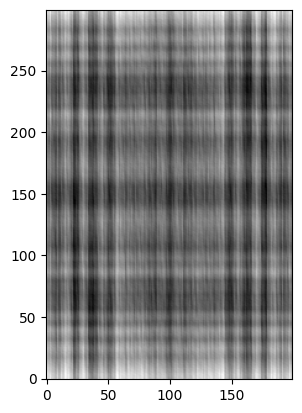

In [57]:
fft_coeffs = {}
for key in fft_filt_10gev.keys():
    inputs = np.concatenate(
        (
            np.concatenate(
                ( 
                    np.array(list(np.ndindex(fft_filt_10gev[key].shape))), 
                    fft_filt_1gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_1gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_5gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_5gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_10gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_10gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_50gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_50gev[key].imag.flatten().reshape(-1,1),
                    np.array([1000]*fft_filt_10gev[key].shape[0]*fft_filt_10gev[key].shape[1]).reshape(-1,1),
                ),
            axis=1
            ),
            np.concatenate(
                ( 
                    np.array(list(np.ndindex(fft_filt_10gev[key].shape))), 
                    fft_filt_1gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_1gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_5gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_5gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_10gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_10gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_50gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_50gev[key].imag.flatten().reshape(-1,1),
                    np.array([5000]*fft_filt_10gev[key].shape[0]*fft_filt_10gev[key].shape[1]).reshape(-1,1),
                ),
            axis=1
            ),
            np.concatenate(
                ( 
                    np.array(list(np.ndindex(fft_filt_10gev[key].shape))), 
                    fft_filt_1gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_1gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_5gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_5gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_10gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_10gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_50gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_50gev[key].imag.flatten().reshape(-1,1),
                    np.array([10000]*fft_filt_10gev[key].shape[0]*fft_filt_10gev[key].shape[1]).reshape(-1,1),
                ),
            axis=1
            ),
            np.concatenate(
                ( 
                    np.array(list(np.ndindex(fft_filt_10gev[key].shape))), 
                    fft_filt_1gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_1gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_5gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_5gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_10gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_10gev[key].imag.flatten().reshape(-1,1),
                    fft_filt_50gev[key].real.flatten().reshape(-1,1)-1, 
                    fft_filt_50gev[key].imag.flatten().reshape(-1,1),
                    np.array([50000]*fft_filt_10gev[key].shape[0]*fft_filt_10gev[key].shape[1]).reshape(-1,1),
                ),
            axis=1
            ),
        ),
        axis=0
    )
    targets = np.concatenate(
        (
            np.concatenate(
                (
                    fft_filt_1gev[key].real.flatten().reshape(-1,1), 
                    fft_filt_1gev[key].imag.flatten().reshape(-1,1) 
                ),
                axis=1
            ),
            np.concatenate(
                (
                    fft_filt_5gev[key].real.flatten().reshape(-1,1), 
                    fft_filt_5gev[key].imag.flatten().reshape(-1,1) 
                ),
                axis=1
            ),
            np.concatenate(
                (
                    fft_filt_10gev[key].real.flatten().reshape(-1,1), 
                    fft_filt_10gev[key].imag.flatten().reshape(-1,1) 
                ),
                axis=1
            ),
            np.concatenate(
                (
                    fft_filt_50gev[key].real.flatten().reshape(-1,1), 
                    fft_filt_50gev[key].imag.flatten().reshape(-1,1) 
                ),
                axis=1
            )
        ),
        axis = 0
    )
    est = HistGradientBoostingRegressor().fit(inputs, targets.transpose()[0])
    print(est.score(inputs, targets.transpose()[0]))
    preds_real = est.predict(inputs)
    est = HistGradientBoostingRegressor().fit(inputs, targets.transpose()[1])
    print(est.score(inputs, targets.transpose()[1]))
    preds_imag = est.predict(inputs)
    for i in range(4):
        fft_filt_preds = np.array(preds_real[i:60000*(i+1)] + 1j*preds_imag[i:60000*(i+1)]).reshape(300,200)
        plt.imshow(abs(np.fft.ifftn(fft_filt_preds)), cmap='gray', origin="lower")


    
    

In [56]:
fft_filt_50gev["X_v_Y"].shape

(300, 200)

In [16]:
reg.coef_ = fft_coeffs["X_v_Y"]["coef_"]
reg.intercept_ = fft_coeffs["X_v_Y"]["intercept_"]
inputs = np.concatenate(
    ( 
        np.array(list(np.ndindex(fft_filt_10gev["X_v_Y"].shape))), 
        fft_filt_10gev["X_v_Y"].real.flatten().reshape(-1,1)*5, 
        fft_filt_10gev["X_v_Y"].imag.flatten().reshape(-1,1)*5,
        np.array([50000]*60000).reshape(-1,1)
    ),
    axis=1
)

In [17]:
bin_preds = reg.predict(inputs)

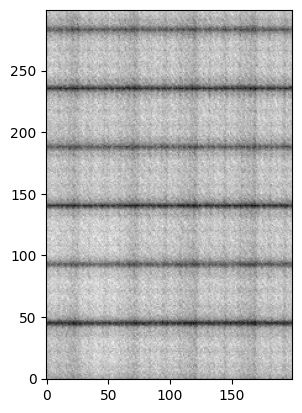

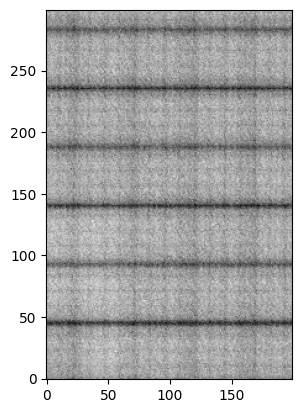

In [27]:
fft_filt_preds = np.array(bin_preds.transpose()[0] + 1j*bin_preds.transpose()[1]).reshape(fft_filt_data_pw["X_v_Y"].shape)
plt.imshow(abs(np.fft.ifftn(fft_filt_preds)), cmap='gray', origin="lower")
plt.show()
plt.imshow(abs(np.fft.ifftn(fft_filt_10gev["X_v_Y"])), cmap='gray', origin="lower")

In [28]:
abs(np.fft.ifftn(fft_filt_50gev["X_v_Y"]*1/9 + fft_filt_5gev["X_v_Y"]*8/9))

array([[1311.93591558, 1309.6617798 , 1311.03322196, ..., 1311.99443476,
        1309.22705505, 1312.46831846],
       [1313.01679868, 1313.60359417, 1310.05991695, ..., 1311.40871309,
        1311.12797236, 1312.57551473],
       [1311.35293768, 1310.32274786, 1310.47433803, ..., 1312.43459988,
        1313.79297238, 1313.40257824],
       ...,
       [1315.95987127, 1315.70224987, 1311.07596128, ..., 1315.4399914 ,
        1314.92303435, 1312.30373598],
       [1315.65984485, 1315.12302682, 1313.67281213, ..., 1312.88281904,
        1312.8621153 , 1312.97844872],
       [1315.22799078, 1311.70547569, 1313.05888941, ..., 1314.05638914,
        1312.50613159, 1315.00013456]])

In [29]:
abs(np.fft.ifftn(fft_filt_10gev["X_v_Y"]))

array([[1303.90215615, 1299.64267185, 1301.57274519, ..., 1301.12643444,
        1297.11568481, 1298.78238637],
       [1300.96977767, 1300.05925648, 1303.62016599, ..., 1304.98775675,
        1303.49843599, 1301.06041553],
       [1304.36590917, 1302.28358986, 1303.83016494, ..., 1304.60803974,
        1301.46221577, 1304.46160012],
       ...,
       [1302.97229155, 1308.12614786, 1300.19867106, ..., 1311.27162941,
        1309.14452634, 1302.48797423],
       [1302.20282174, 1304.3287208 , 1301.19678783, ..., 1300.66378327,
        1302.24350152, 1303.36883739],
       [1306.20896028, 1302.02267084, 1303.05919273, ..., 1306.01371069,
        1305.32820824, 1303.81525011]])